In [ ]:
# Importing libraries and the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Reading the dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")

In [3]:
# Some quick data exploration
df.head(10)  #Printing the dataset to explore first 10 row datavisually,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# look at summary of numerical fields by using describe() function
# It Printout summary statistics for numerical fields
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#also look at the median of these variables and compare them with mean
#to see possible skew in the dataset
df['Age'].median()

28.0

In [6]:
#For the non-numerical values (e.g. Sex, Embarked etc.)
#we can look at unique values to understand whether they 
#make sense or not
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
#Distribution analysis
#familiar with basic data characteristics 
#distribution of various variables 
#%matplotlib ::Set up matplotlib to work interactively.
#This function lets you activate matplotlib interactive support at any point during an IPython session. 
#It does not import anything into the interactive namespace.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


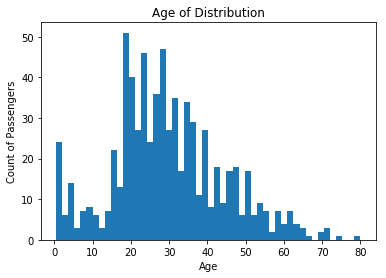

In [12]:
#plot histograms for "Age" and "Fare" using the following commands
fig=plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'],bins=50,range= (df['Age'].min(),df['Age'].max()))
plt.title('Age of Distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

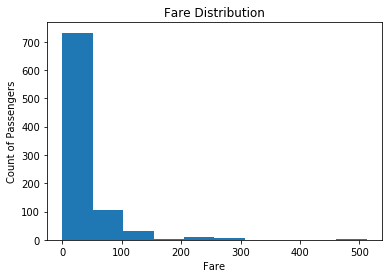

In [13]:
#Plot histogram of "Fare"
fig=plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'],bins=10,range= (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

In [ ]:
#Box plots to understand the distributions.
#Box plot for "Fare" can be plotted by:

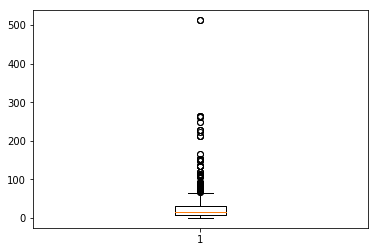

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df['Fare'])
plt.show()


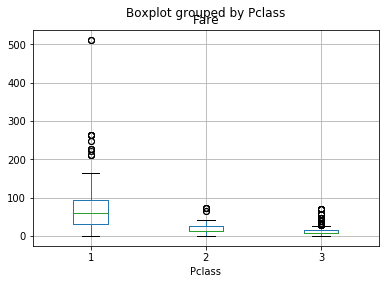

In [15]:
#looking at fare across the 3 passenger classes. 
#Let us segregate them by Passenger class

df.boxplot(column='Fare', by ='Pclass')


##### Clearly, both Age and Fare require some amount of data munging. Age has about 31% missing values, while Fare has a few Outliers, which demand deeper understanding

### Categorical variable analysis:

###### Following code plots the distribution of population by PClass and their probability of survival

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

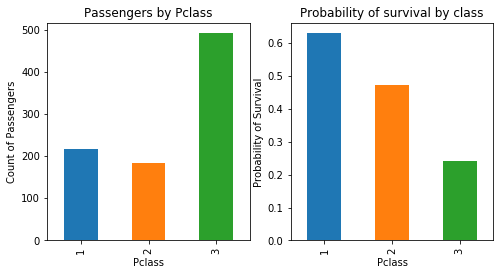

In [23]:
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

temp2

#### These two plots can also be visualized by combining them in a stacked chart:

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

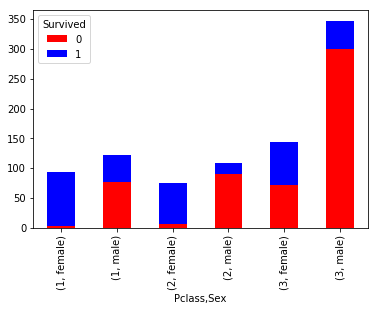

In [30]:
temp3 = pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))


temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


temp3